## Hypocycloid definition and animation ##

### Deriving the parametric equations of a hypocycloid ###

On May 11 @fermatslibrary posted a gif file, https://twitter.com/fermatslibrary/status/862659602776805379, illustrating the motion of eight cocircular points. The Fermat's Library followers found  it so fascinating that the tweet  picked up more than 1000 likes and 800 retweets. Soon after I saw  the gif I created a similar Python Plotly  animation 
     although the tweet did not mention how it was generated. @plotlygraphs tweeted a link
    to my [Jupyter notebook](http://nbviewer.jupyter.org/github/empet/Math/blob/master/fermat-circle-moving-online.ipynb) presenting the animation code.
    
How I succeeded to reproduce it  so fast?  Here I explain  the secret:
    
 At the first sight you can think that the gif  displays  an illusory rectiliniar motion of the eight points,  but it is a real one.  I noticed that the moving   points lie on a rolling circle along another circle, and I knew that a fixed point on a rolling circle describes a curve called hypocycloid. In the particular case when the ratio of the two radii  is 2 the hypocycloid degenerates to a diameter in the base (fixed) circle.
 
 In this Jupyter notebook I deduce the parametric equations of  a hypoycyloid,  animate its construction
 and explain why when $R/r=2$ any point on the rolling circle runs a  diameter  in the base circle.

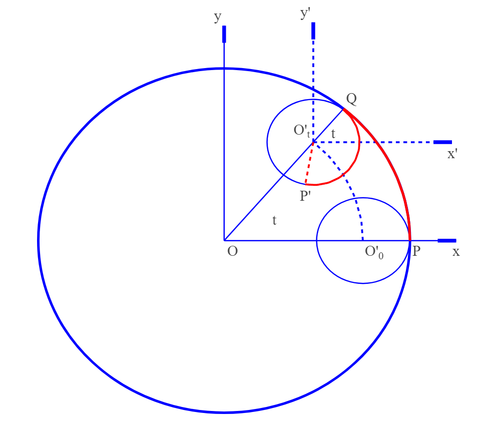

In [1]:
from IPython.display import Image
Image(filename='generate-hypocycloid.png')

We refer to the figure in the above cell to explain how we get the parameterization of the hypocycloid generated by a fixed point of a circle of center $O'_0$ and radius r, rolling without slipping along  the circle
of center O and radius $R>r$.

Suppose that initially the hypocycloid generating point, $P$, is located at $(R,0)$.
After the small circle was rolling along the greater circle a length corresponding to an angle of measure, $t$, it reaches the point $P'$ on the circle $C(O'_t, r)$.

Rolling without slipping means that the length the arc $\stackrel{\frown}{PQ}$ of the greater circle equals the length of the arc $\stackrel{\frown}{P'Q}$ on the smaller one, i.e $Rt=r\omega$, where $\omega$ is the measure of the non-oriented angle $\widehat{P'O'_tQ}$ (i.e. we consider $\omega>0$) . Thus $\omega=(R/r)t$

The center $O'_t$ has the coordinates $x=(R-r)\cos(t), (R-r)\sin(t)$. The clockwise parameterization of the circle  $C(O'_t,r)$ with respect to the coordinate system $x'O'_ty'$ is as follows:

$$\begin{array}{llr}
x'(\tau)&=&r\cos(\tau)\\
y'(\tau)&=&-r\sin(\tau),
\end{array}$$
 $\tau\in[0,2\pi]$.
 
Hence the point $P'$ on the hypocycloid has the coordinates:
$x'=r\cos(\omega-t), y'=-r\sin(\omega-t)$, and with respect to $xOy$, the coordinates:

$x=(R-r)\cos(t)+r\cos(\omega-t), y=(R-r)\sin(t)-r\sin(\omega-t)$.

Replacing $\omega=(R/r)t$ we get the parameterization of the hypocycloid generated by the initial  point $P$:

$$\begin{array}{lll}
x(t)&=&(R-r)\cos(t)+r\cos(t(R-r)/r)\\
y(t)&=&(R-r)\sin(t)-r\sin(t(R-r)/r), \quad t\in[0,2\pi]
\end{array}$$


If  $R/r=2$ the parametric equations of the corresponding hypocycloid are:

$$\begin{array}{lll}
x(t)&=&2r\cos(t)\\
y(t)&=&0
\end{array}$$

i.e. the moving point $P$ runs  the diameter $y=0$,   from the position $(R=2r, 0)$  to $(-R,0)$  when $t\in[0,\pi]$,
and back to $(R,0)$, for $t\in[\pi, 2\pi]$.  

What about the trajectory of any other   point, $A$,  on the rolling circle that at $t=0$ has the angular coordinate $\varphi$ with respect to the center $O'_0$?  

We show that it is also a diameter in the base circle, referring to the figure in the next cell that is a particularization of
the above figure to the case $R=2r$.

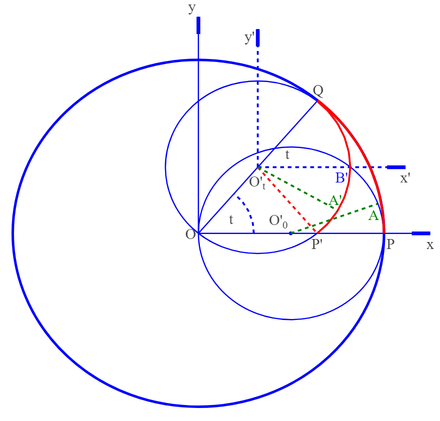

In [2]:
Image(filename='hypocycloid-2r.png')

The arbitrary point $A$ on the rolling circle has, for t=0, the coordinates:
$x=r+r\cos(\varphi), y=r\sin(\varphi)$.     

The angle $\widehat{QO'_tP'}=\omega$ is in this case $2t$, and $\widehat{B'O'_tP'}=t$. Since $\widehat{A'O'_tP'}=\varphi$, we get that the position of the fixed point on the smaller circle,  after rolling along an arc of length $r(2t-\varphi)$,
is $A'(x(t)=r\cos(t)+r\cos(t-\varphi), y(t)=r\sin(t)-r\sin(t-\varphi))$, with $\varphi$ constant, and $t$ variable in the interval  $[\varphi, 2\pi+\varphi]$.

Let us show that $y(t)/x(t)=$constant for all $t$, i.e. the generating point of the hypocycloid lies on a segment of line (diameter in the base circle):

$$\displaystyle\frac{y(t)}{x(t)}=\frac{r\sin(t)-r\sin(t-\varphi)}{r\cos(t)+r\cos(t-\varphi)}=\left\{\begin{array}{ll}\tan(\varphi/2)& \mbox{if}\:\: t=\varphi/2\\
\displaystyle\frac{2\cos(t-\varphi/2)\sin(\varphi/2)}{2\cos(t-\varphi/2)\cos(\varphi/2)}=\tan(\varphi/2)& \mbox{if}\:\: t\neq\varphi/2 \end{array}\right.$$

Hence the @fermatslibrary animation, illustrated by a Python Plotly code in my [Jupyter notebook](http://nbviewer.jupyter.org/github/empet/Math/blob/master/fermat-circle-moving-online.ipynb), displays the motion of the eight points placed on the rolling
circle of radius $r=R/2$, along the corresponding diameters in the base circle.

### Animating the hypocycloid generation ###

In [3]:
import numpy as np
from numpy import pi, cos, sin
import copy

In [4]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import time

Set the layout of the plot:

In [5]:
axis=dict(showline=False,  
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          range=[-1.1,1.1],
          autorange=False,
          title='' 
          )

layout=dict(title='',
            font=dict(family='Balto'),
            autosize=False,
            width=600,
            height=600,
            showlegend=False,
            xaxis=dict(axis),
            yaxis=dict(axis),
            hovermode='closest',
            shapes=[],
            updatemenus=[dict(type='buttons',
                              showactive=False,
                              y=1,
                              x=1.2,
                              xanchor='right',
                              yanchor='top',
                              pad=dict(l=10),
                              buttons=[dict(label='Play',
                                            method='animate',
                                            args=[None, dict(frame=dict(duration=90, redraw=False), 
                                            transition=dict(duration=0),
                                            fromcurrent=True,
                                            mode='immediate'
                                                )]
                                            )]
                            )]
           )

Define the base circle:

In [6]:
layout['shapes'].append(dict(type= 'circle',
                         layer= 'below',
                         xref= 'x',
                         yref='y',
                         fillcolor= 'rgba(245,245,245, 0.95)',
                         x0= -1.005,
                         y0= -1.005,
                         x1= 1.005,
                         y1= 1.005,
                         line= dict(color= 'rgb(40,40,40)', width=2
                            )
                         )
                       )

In [7]:
def circle(C, rad):
    #C=center, rad=radius
    theta=np.linspace(0,1,100)
    return C[0]+rad*cos(2*pi*theta), C[1]-rad*sin(2*pi*theta)
    

Prepare data for animation to be uploaded to Plotly cloud:

In [8]:
def set_my_columns(R=1.0, ratio=3):
    #R=the radius of base circle
    #ratio=R/r, where r=is the radius of the rolling circle
    r=R/float(ratio)
    xrol, yrol=circle([R-r, 0], 0)

    my_columns=[Column(xrol, 'xrol'), Column(yrol, 'yrol')]

    my_columns.append(Column([R-r, R], 'xrad'))  
    my_columns.append(Column([0,0], 'yrad'))
    my_columns.append(Column([R], 'xstart'))  
    my_columns.append(Column([0], 'ystart'))
   
    a=R-r
    b=(R-r)/float(r)
    frames=[]
    t=np.linspace(0,1,50)
    xpts=[]
    ypts=[]
    for k in range(t.shape[0]):
        X,Y=circle([a*cos(2*pi*t[k]), a*sin(2*pi*t[k])], r)
        my_columns.append(Column(X, 'xrcirc{}'.format(k+1)))
        my_columns.append(Column(Y, 'yrcirc{}'.format(k+1)))
        #The generator point has the coordinates(xp,yp)
        xp=a*cos(2*pi*t[k])+r*cos(2*pi*b*t[k])
        yp=a*sin(2*pi*t[k])-r*sin(2*pi*b*t[k])
        xpts.append(xp)
        ypts.append(yp)
        my_columns.append(Column([a*cos(2*pi*t[k]), xp], 'xrad{}'.format(k+1)))
        my_columns.append(Column([a*sin(2*pi*t[k]), yp], 'yrad{}'.format(k+1)))
        my_columns.append(Column(copy.deepcopy(xpts), 'xpt{}'.format(k+1)))
        my_columns.append(Column(copy.deepcopy(ypts), 'ypt{}'.format(k+1)))
       
    return t, Grid(my_columns)


In [9]:
def set_data(grid):
    

    return [dict(xsrc=grid.get_column_reference('xrol'),#rolling circle
                 ysrc= grid.get_column_reference('yrol'),
                 mode='lines',
                 line=dict(width=2, color='blue'),
                 name='',
                ),
            dict(xsrc=grid.get_column_reference('xrad'),#radius in the rolling circle
                 ysrc= grid.get_column_reference('yrad'),
                 mode='markers+lines',
                 line=dict(width=1.5, color='blue'),
                 marker=dict(size=4, color='blue'),
                 name=''),
            
            dict(xsrc=grid.get_column_reference('xstart'),#starting point  on the  hypocycloid
                 ysrc= grid.get_column_reference('ystart'),
                 mode='marker+lines',
                 line=dict(width=2, color='red', shape='spline'),
                 name='')
           ]

Set data for each animation frame:

In [10]:
def set_frames(t, grid):
   
    return [dict(data=[dict(xsrc=grid.get_column_reference('xrcirc{}'.format(k+1)),#update rolling circ position
                            ysrc=grid.get_column_reference('yrcirc{}'.format(k+1))
                                     ),
                                 dict(xsrc=grid.get_column_reference('xrad{}'.format(k+1)),#update the radius 
                                      ysrc=grid.get_column_reference('yrad{}'.format(k+1))#of generating point
                                     ),
                                 dict(xsrc=grid.get_column_reference('xpt{}'.format(k+1)),#update hypocycloid arc
                                      ysrc=grid.get_column_reference('ypt{}'.format(k+1))
                                     )
                      ],
                 traces=[0,1,2])  for k in range(t.shape[0])
               ] 
    

Animate the generation of a hypocycloid with 3 cusps(i.e.  $R/r=3$):

In [30]:
py.sign_in('empet', 'my_api_key')#access my Plotly account

t, grid=set_my_columns(R=1, ratio=3)
py.grid_ops.upload(grid, 'animdata-hypo3'+str(time.time()), auto_open=False)#upload data to Plotly cloud

u'https://plot.ly/~empet/14320/'

In [31]:
data1=set_data(grid)
frames1=set_frames(t, grid)
title='Hypocycloid with '+str(3)+' cusps, '+'<br>generated by a fixed point of a circle rolling inside another circle; R/r=3'
layout.update(title=title)
fig1=dict(data=data1, layout=layout, frames=frames1)
py.icreate_animations(fig1, filename='anim-hypocycl3'+str(time.time()))

Hypocycloid with four cusps (astroid):

In [32]:
t, grid=set_my_columns(R=1, ratio=4)
py.grid_ops.upload(grid, 'animdata-hypo4'+str(time.time()), auto_open=False)#upload data to Plotly cloud

u'https://plot.ly/~empet/14322/'

In [33]:
data2=set_data(grid)
frames2=set_frames(t, grid)
title2='Hypocycloid with '+str(4)+' cusps, '+'<br>generated by a fixed point of a circle rolling inside another circle; R/r=4'
layout.update(title=title2)
fig2=dict(data=data2, layout=layout, frames=frames2)
py.icreate_animations(fig2, filename='anim-hypocycl4'+str(time.time()))

Degenerate hypocycloid (R/r=2):

In [11]:
t, grid=set_my_columns(R=1, ratio=2)
py.grid_ops.upload(grid, 'animdata-hypo2'+str(time.time()), auto_open=False)#upload data to Plotly cloud

u'https://plot.ly/~empet/14326/'

In [12]:
data3=set_data(grid)
frames3=set_frames(t, grid)
title3='Degenerate Hypocycloid; R/r=2'
layout.update(title=title3)
fig3=dict(data=data3, layout=layout, frames=frames3)
py.icreate_animations(fig3, filename='anim-hypocycl2'+str(time.time()))

In [14]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()